# TensorFlow

## Работа со сложными данными

In [5]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools
warnings.simplefilter(action="ignore", category=FutureWarning)

In [6]:
train_df = pd.read_csv('./data/train.csv')

In [7]:
train_df.head()

,x,y,color
0,2.375386,-2.151675,0.0
1,0.155175,-3.939919,1.0
2,0.580631,-2.425793,1.0
3,2.045291,-2.755232,0.0
4,0.637783,-1.396165,1.0


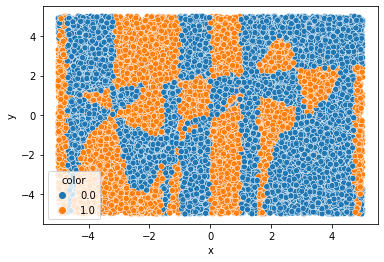

In [8]:
sns.scatterplot(data=train_df, x='x', y='y', hue='color')
plt.show()

Т.к. мы обучаем модель батчами, а данные у нас идут по порядку, то их нужно перемещать, чтобы в каждый батч входили разные данные. Так для модели будет спроецирована более жизненная ситуация:

In [9]:
np.random.shuffle(train_df.values)

In [10]:
x = np.column_stack((train_df.x.values, train_df.y.values)) # векторизиурем признаки и соединим их

Разделим на тестовую и обучающую выборки

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, train_df.color.values, test_size=0.2, random_state=42, stratify=train_df.color.values)

Здесь ниже создаем саму модель: 

Мы можем добавить количество слоев и повысить кол-во нейронов:

In [17]:
model = keras.Sequential([ # Sequential - значит, что у нас есть определенное кол-во слоев в сети. Этот тип, позволяет 
    #перечислить эти слои
    #Здесь первый слой - это  вхожной слой, куда поступают данные, а второй слой - слой на выходе
    keras.layers.Dense(units = 256, input_shape=(2,), activation='relu'), #здесь мы получаем доступ к слоям (к примеру нажми на Tab и увидишь наименования слоев)
    #нам нужно сеть, у которая все связи полностью прямо соеденены, поэтому мы выбираем Dense
    #Units  - количество нейронов
    #input_shape = размерность пространства признаков (2 признака, поэтому оставляем 2)
    #activation - функция активации. Самое надежное - это relu.
    #keras.layers.Dropout(rate=0.2), #Данный слой помогает уменьшить переобучение 
    #(рандомно разрывает нейроные связи в каждом обновлении)
    #rate - процент, который определяет рандомность разрыва связей 
    #(то есть здесь некоторые units спадают на 0). Каждая сеть машина больше учится на своих ошибках
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units = 128, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units = 128, activation='relu'),
    keras.layers.Dense(units = 2, activation='sigmoid')])
    #Количество "нейронов" - 2, т.к. точки могут быть либо синими, либо красными.
    # для задания бинарной классификации лучше подходит sigmoid

In [18]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy']) #здесь мы говорим как модели обучаться.
# adam - наиболее безопасная модель оптимайзера
# loss - функций потерь (чему модель отдает предпочтение в процессе обучения) 
#(возвращает число потерь от неправильных ответов модели и обычно применяется для обучения). 
#Используем sparse_categorical_crossentropy, т.к.
# целевой признак у нас не one-hot-encoding, a ordinal encoding
# from_logits - ставим True, когда сумма ответом может быть не один (то есть может быть 5). Значит, значения не являеются вероятность
# от 0 до 1.
#metrics = 'accuracy' - метрика качества

Сам процесс обучения:

- Здесь мы можем повысить количество эпох

На вход поступают гиперпараметры: размер батча, количество эпох и величина шага.


Определяются начальные значения весов модели.


Для каждой эпохи обучающая выборка разбивается на батчи.


Для каждого батча:


4.1. Вычисляется градиент функции потерь;


4.2. Обновляются веса модели (к текущим значениям весов прибавляется антиградиент, умноженный на величину шага).

In [22]:
model.fit(x, train_df.color.values, batch_size=4, epochs = 20) #векторизируем признаки и таргеты
#выбора делится на N частей (batch_size), так модель обучается быстрее, и когда модель обучается, то проходит эпоха

Epoch 1/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2454 - accuracy: 0.8946
Epoch 2/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2411 - accuracy: 0.8969
Epoch 3/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2388 - accuracy: 0.8986
Epoch 4/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2384 - accuracy: 0.8993
Epoch 5/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2363 - accuracy: 0.8995
Epoch 6/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2342 - accuracy: 0.9003
Epoch 7/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2342 - accuracy: 0.9013
Epoch 8/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2304 - accuracy: 0.9028
Epoch 9/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2337 - accuracy: 0.9021
Epoch 10/20
5000/5000 [==============================] - 7s 1ms/step - loss: 0.227

Проверим на тестовой выборке:

In [21]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 0s 1ms/step - loss: 0.1673 - accuracy: 0.9350


C:\Users\yanka\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.1672762632369995, 0.9350000023841858]